Задание 1

Предскажите число заражений COVID-19 в США к 16.04.

Для этого скачайте датасет о числе зарегистрированных случаев по ссылке:
https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
 
Поле ‘fips’ - это стандартный географический идентификатор. Узнать подробности можно в репозитории New York Times:
https://github.com/nytimes/covid-19-data

Учитывайте, что распространение вируса происходит экспоненциально. Каждый зараженный до момента госпитализации или домашнего лечения успевает заразить несколько человек. 
Однако власти принимают карантинные и социальные меры, что уменьшает скорость распространения. Постарайтесь отследить и смоделировать влияние принимаемых мер. 
Каждый штат действует по-своему, так что оценивать скорость распространения инфекции лучше по каждому штату в отдельности. Или попробуйте объединить штаты  с похожей картиной распространения по группам.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as sts
%matplotlib inline

In [29]:
us_stat = pd.read_csv('us-counties.csv')
us_stat['date'] = pd.to_datetime(us_stat['date']) 

In [12]:
unique_states = set(us_stat['state']) # просто перечислим штаты, которые уже заражены

In [48]:
us_stat.sort_values(by = 'date')

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
52063,2020-04-12,Campbell,Kentucky,21037.0,45,3
52064,2020-04-12,Carroll,Kentucky,21041.0,2,0
52065,2020-04-12,Carter,Kentucky,21043.0,3,0
52067,2020-04-12,Clark,Kentucky,21049.0,18,0


Можем заметить, что первые заболевшие были выявлены в Вашингтоне, округе Снохомиш. Давайте посмотрим, что происходило с этим округом:

In [79]:
snh_stat = us_stat[us_stat['county'] == 'Snohomish'][['date', 'cases', 'deaths']]

In [80]:
snh_stat

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
4,2020-01-24,1,0
7,2020-01-25,1,0
...,...,...,...
43154,2020-04-08,1694,61
45746,2020-04-09,1701,63
48374,2020-04-10,1801,66
51031,2020-04-11,1834,67


Для начала выведем функцию роста заболевших до данного момента по всей стране.

In [39]:
cases_date = us_stat.groupby('date')['cases'].sum()
death_date = us_stat.groupby('date')['deaths'].sum()
death_date

date
2020-01-21        0
2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
              ...  
2020-04-08    14779
2020-04-09    16685
2020-04-10    18720
2020-04-11    20579
2020-04-12    22058
Name: deaths, Length: 83, dtype: int64

In [32]:
dates = matplotlib.dates.date2num(us_stat['date'])
dates

array([737445., 737446., 737447., ..., 737527., 737527., 737527.])

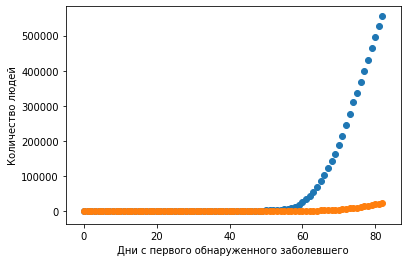

In [89]:
x = range(len(cases_date))
plt.figure()
plt.scatter(x, cases_date)
plt.scatter(x, death_date)
plt.ylabel('Количество людей')
plt.xlabel('Дни с первого обнаруженного заболевшего')
plt.show()

Рассмотрим прирост заболевших, сколько людей находят каждый день.

In [68]:
us_stat.groupby('date')['cases'].sum()

date
2020-01-21         1
2020-01-22         1
2020-01-23         1
2020-01-24         2
2020-01-25         3
               ...  
2020-04-08    429283
2020-04-09    463689
2020-04-10    496904
2020-04-11    528422
2020-04-12    555374
Name: cases, Length: 83, dtype: int64

In [73]:
us_clf = us_stat.groupby('date')['cases'].sum()
prev = 0
for i in range (len(us_clf)):
    us_clf[i] -= prev
    prev = prev + us_clf[i]
us_clf

date
2020-01-21        1
2020-01-22        0
2020-01-23        0
2020-01-24        1
2020-01-25        1
              ...  
2020-04-08    31531
2020-04-09    34406
2020-04-10    33215
2020-04-11    31518
2020-04-12    26952
Name: cases, Length: 83, dtype: int64

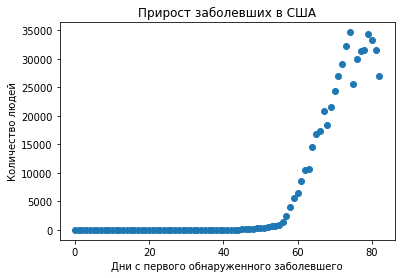

In [74]:
x = range(len(us_clf))
plt.figure()
plt.scatter(x, us_clf)
plt.title('Прирост заболевших в США')
plt.ylabel('Количество людей')
plt.xlabel('Дни с первого обнаруженного заболевшего')
plt.show()

In [ ]:
Можем заметить, что за полсдение три дня количество новых зараженных уменьшилось, 

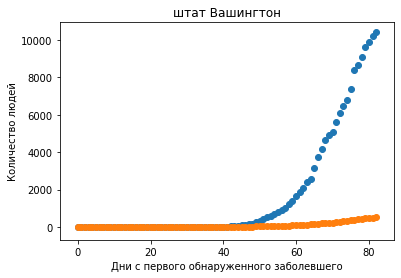

In [88]:
wash_cases = us_stat[us_stat['state'] == 'Washington'].groupby('date')['cases'].sum()
wash_deaths = us_stat[us_stat['state'] == 'Washington'].groupby('date')['deaths'].sum()
x = range(len(wash_cases))
plt.figure()
plt.scatter(x, wash_cases)
plt.scatter(x, wash_deaths)
plt.title('штат Вашингтон')
plt.ylabel('Количество людей')
plt.xlabel('Дни с первого обнаруженного заболевшего')
plt.show()

Можно заметить, что линия заражаемости к концу частично сгладилась, что может обозначать то, что введеный в штате строгий карантин дал свои результата. На данный момент можно предположить, что спустя карантинный срок количество появляющихся заболеващих в день постепенно опустится и пик болезни пройдет примерно через 2-3 недели.

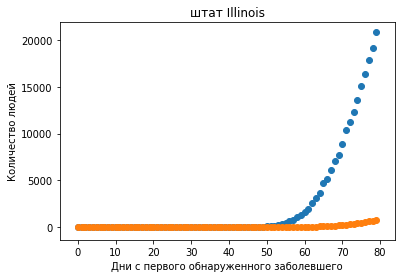

In [87]:
illi_cases = us_stat[us_stat['state'] == 'Illinois'].groupby('date')['cases'].sum()
illi_deaths = us_stat[us_stat['state'] == 'Illinois'].groupby('date')['deaths'].sum()
x = range(len(illi_cases))
plt.figure()
plt.scatter(x, illi_cases)
plt.scatter(x, illi_deaths)
plt.title('штат Illinois')
plt.ylabel('Количество людей')
plt.xlabel('Дни с первого обнаруженного заболевшего')
plt.show()

В штате Illinois же на данный момент не вводят карантинные меры, поэтому вирус распространяется все больше. 

In [52]:
set(us_stat['state'])

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Northern Mariana Islands',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virgin Islands',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

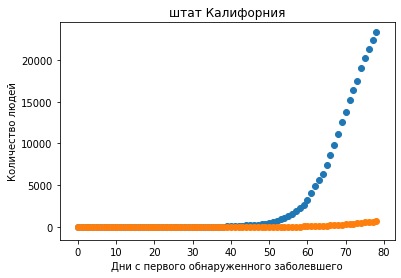

In [85]:
clf_cases = us_stat[us_stat['state'] == 'California'].groupby('date')['cases'].sum()
clf_deaths = us_stat[us_stat['state'] == 'California'].groupby('date')['deaths'].sum()
x = range(len(illi_cases))
plt.figure()
plt.scatter(x, clf_cases)
plt.scatter(x, clf_deaths)
plt.title('штат Калифорния')
plt.ylabel('Количество людей')
plt.xlabel('Дни с первого обнаруженного заболевшего')
plt.show()

In [58]:
us_stat[us_stat['state'] == 'California'].groupby('date')['cases'].sum()

date
2020-01-25        1
2020-01-26        2
2020-01-27        2
2020-01-28        2
2020-01-29        2
              ...  
2020-04-08    19043
2020-04-09    20191
2020-04-10    21366
2020-04-11    22421
2020-04-12    23323
Name: cases, Length: 79, dtype: int64

США не вводила карантин на общегосударственном уровне, так что рассмотрим ситуации в некоторых штатах.

К примеру в Калифорнии карантин (а точнее добровольную самоизоляцию) ввели в середине марта. Попробуем построить график прироста заболевших, так как из графика заболеваемости на данный момент не видно никакого прогресса.

In [61]:
inc_clf = us_stat[us_stat['state'] == 'California'].groupby('date')['cases'].sum()
prev = 0
for i in range (len(inc_clf)):
    inc_clf[i]-= prev
    prev = prev + inc_clf[i]

date
2020-01-25       1
2020-01-26       1
2020-01-27       0
2020-01-28       0
2020-01-29       0
              ... 
2020-04-08    1504
2020-04-09    1148
2020-04-10    1175
2020-04-11    1055
2020-04-12     902
Name: cases, Length: 79, dtype: int64

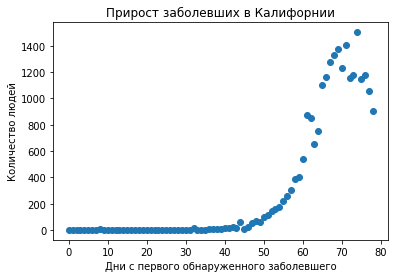

In [83]:
x = range(len(inc_clf))
plt.figure()
plt.scatter(x, inc_clf)
plt.title('Прирост заболевших в Калифорнии')
plt.ylabel('Количество людей')
plt.xlabel('Дни с первого обнаруженного заболевшего')
plt.show()

Мы видим то, что хотя Калифорния и далека от того, чтобы окончательно избавиться от коронавируса, однако количество новых обнаруженных людей, заболевших коронавирусом, значительно уменьшилось за последние дни, которые как раз и являются завершающими инкубационного периода с начала введения карантина.

Можно предположить, что если карантин не отменят 19 апреля (как планировали), то Через пару недель штат окончательно пройдет пик заболеваемости.

#### Теперь попробуем непрого спрогнозировать визуально, а не только методом рассуждений, более конкретно:

По факту это задача прогнозирования временных рядов и в идеале конечно надо расшарить, как работает обучение прогнозированию, создать модель, обучить ее на Китае или Италии и возможно на примерах каких-нибудь других пандемий, переделав далее под условия нынешнего коронавируса конкретно в США. Но пока что знания для такого нет, так что делаем нечто проще и страннее, быстро разобраться не получилось(

За оценку всего США очень сложно взяться, так как штаты достаточно самостоятельные и в каждом приняты свои меры, в зависимости от которых надо отталкиваться и которые надо учитвать, так что пробуем в рамках штата, одного из выше рассмотренных.

К идеям - еще можно рассмотреть округи, в которых идет на спад/на повышение количество зараженных, посмотреть на статистику смертности, понять, что это все напоминает, оптимизировать от каких-то выбивающихся шумов.

Всем известно, что на данный момент скорость роста заболевших идет экспоненциально, попробуем аппроксимировать функцию, то есть решить задачу интерполяции - найдя промежуточные точни дискретного распределения.

Как мы это сделаем максимально просто:
Ложим на экспоненту зависимость количества больных от даты и логарифмируем.

In [99]:
def analyze_state(state_name):
    y = np.array(us_stat[us_stat['state'] == state_name].groupby('date')['cases'].sum())
    x = range(len(y))
    return x, y

In [102]:
def build_plot(x, y, state):
    plt.figure()
    plt.plot(x, np.log(y), 'r')
    plt.title(state)

/Users/elis351/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/elis351/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/elis351/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control

/Users/elis351/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/elis351/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/elis351/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control

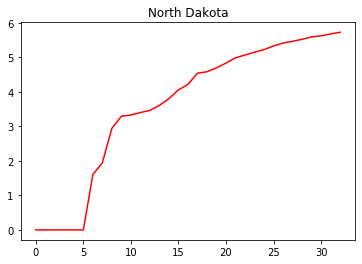

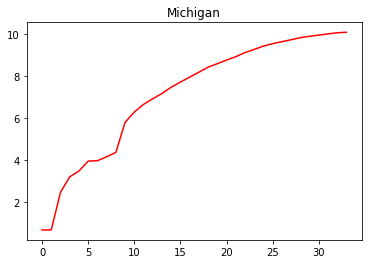

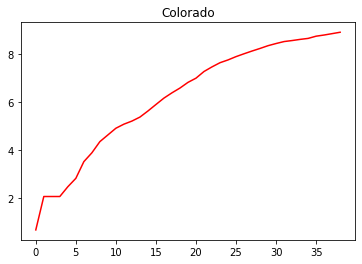

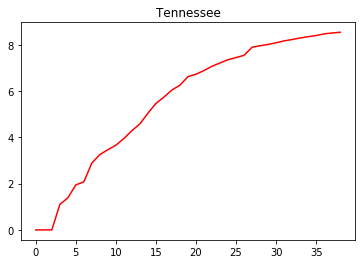

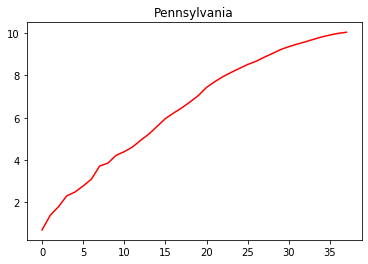

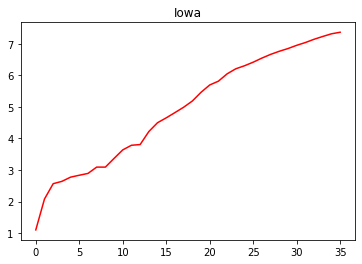

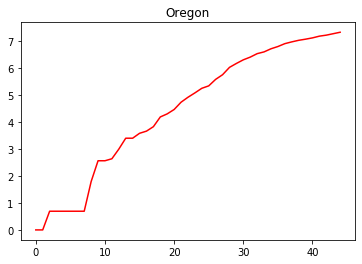

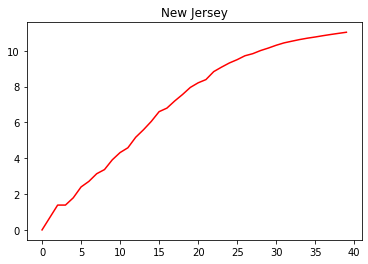

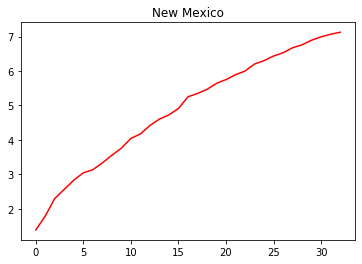

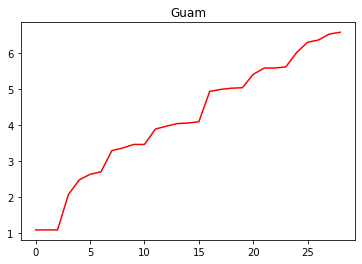

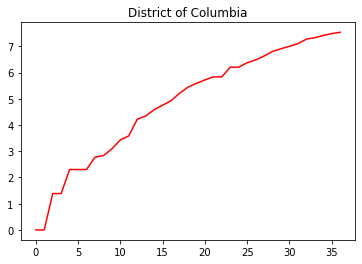

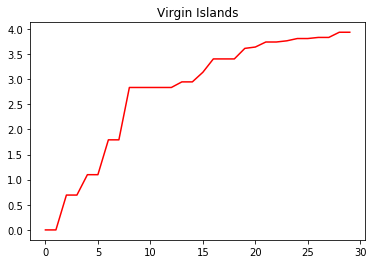

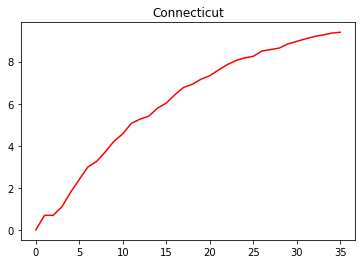

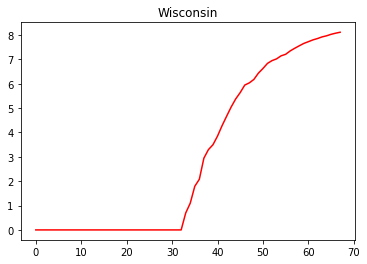

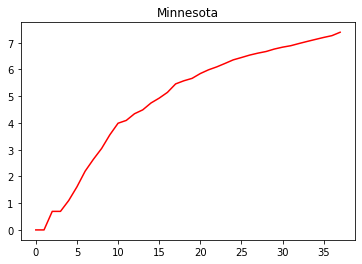

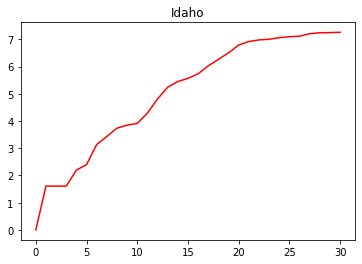

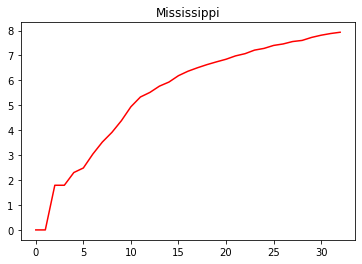

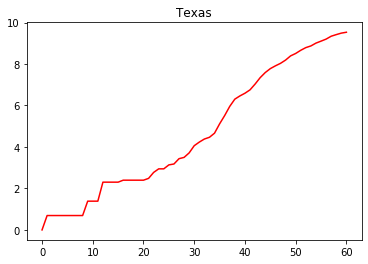

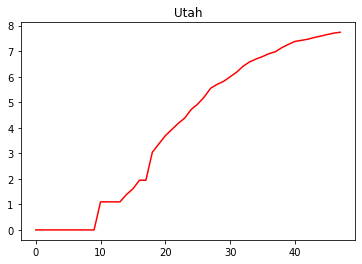

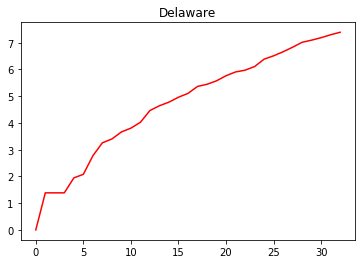

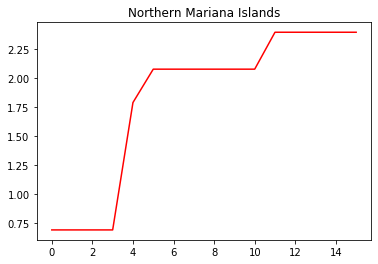

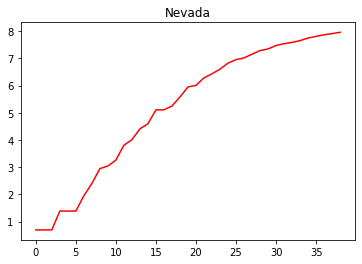

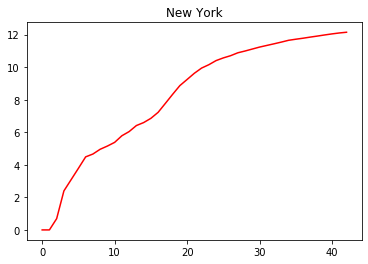

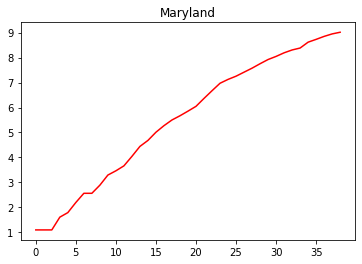

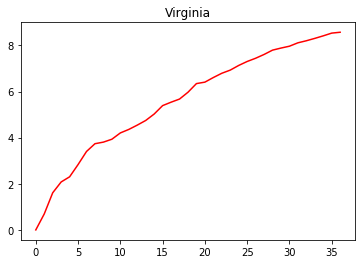

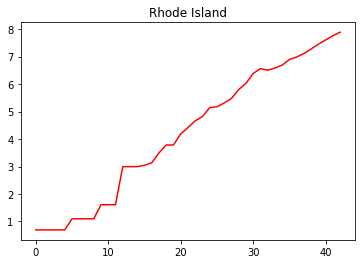

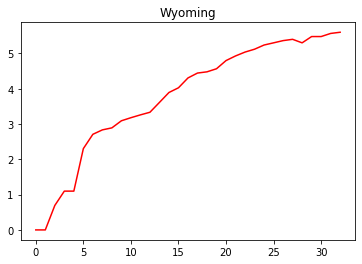

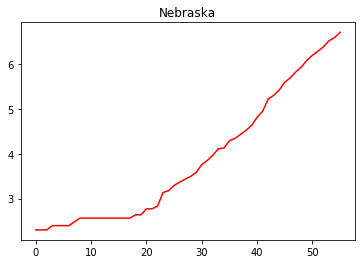

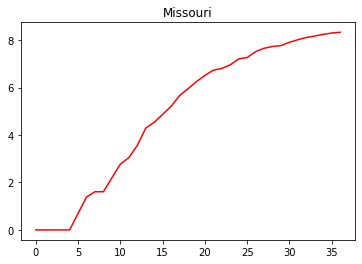

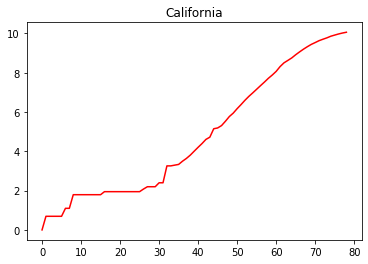

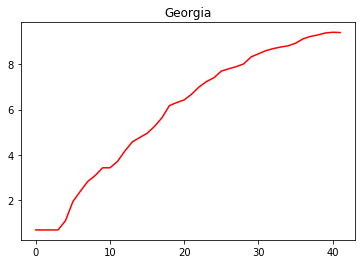

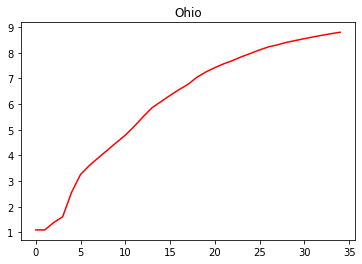

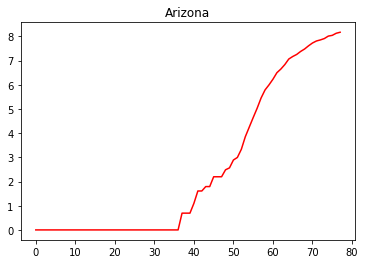

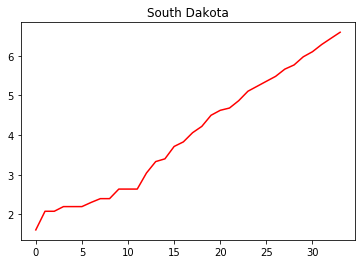

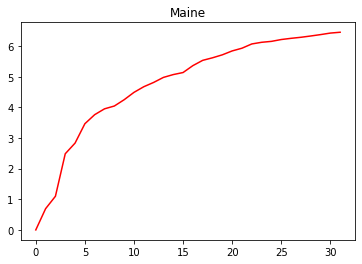

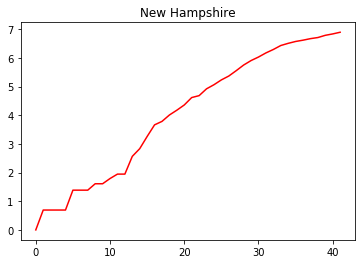

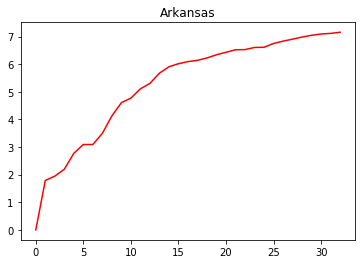

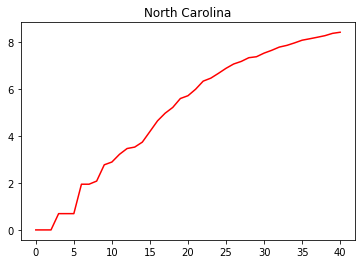

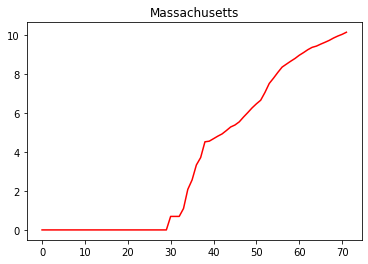

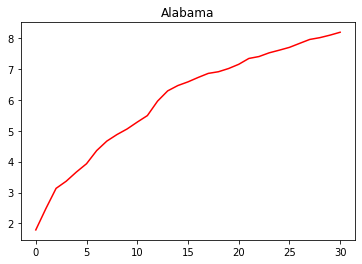

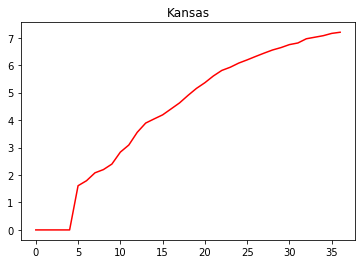

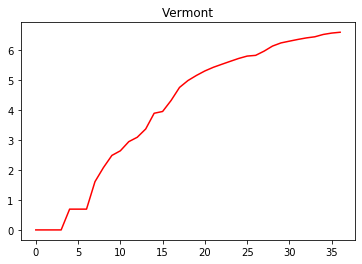

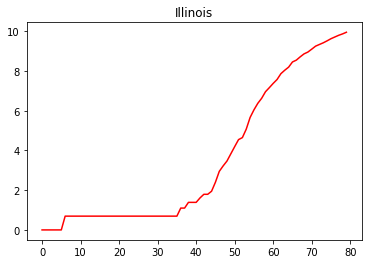

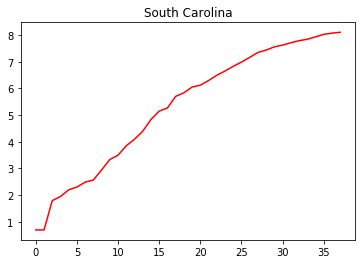

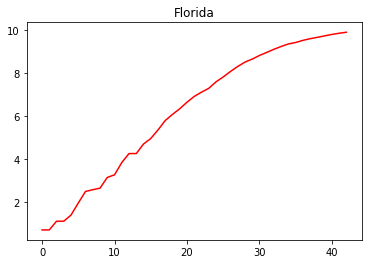

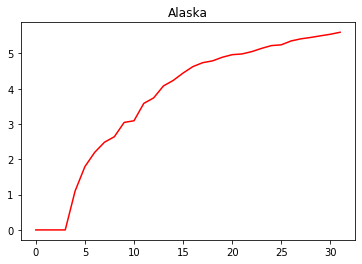

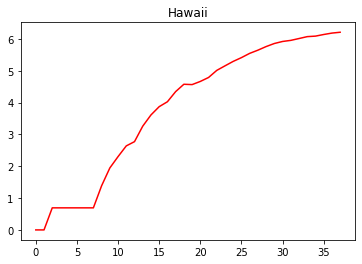

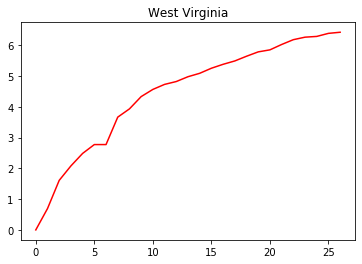

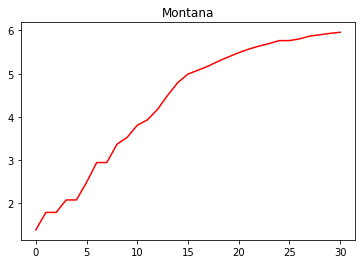

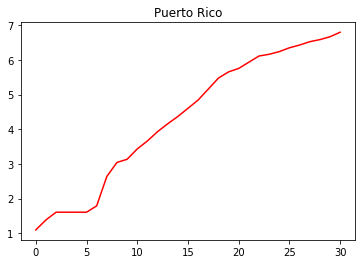

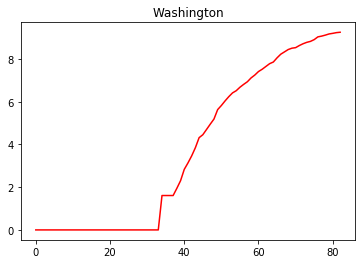

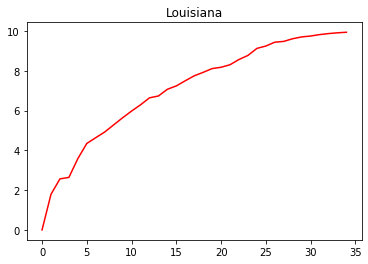

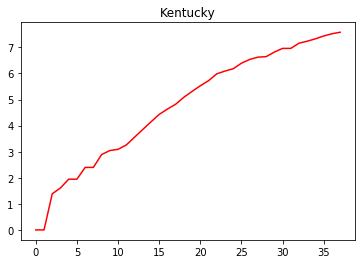

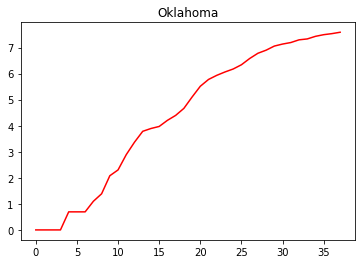

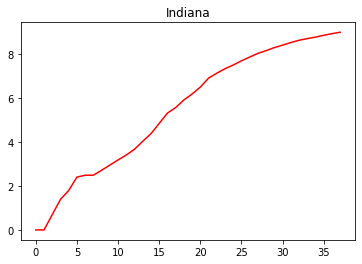

In [103]:
for i in unique_states:
    x, y = analyze_state(i)
    build_plot(x, y, i)

Можно заметить, что в некоторых случаях график частично похож на прямую или приближен к ней, то есть рост действительно экспоненциальный или близкий к нему.

В других случаях можно попробовать приблизить к другой функции, получив свои результаты.

У нас также есть коды округов, их можно перенести н акоординаты при желании и сделать прогноз территориального перемещения пика распространения коронавируса.